In [99]:

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns



In [48]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [49]:
df.shape

(158, 12)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

since country and region are object type we dont required them 

In [51]:
df.drop(['Country', 'Region'], axis=1,inplace = True)

In [52]:
df.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [53]:
df.rename(columns = {'Economy (GDP per Capita)':'Economy_GDP', 'Health (Life Expectancy)':'Health_life_Expectancy','Happiness Rank':'Happiness_rank'}, inplace = True)

In [54]:
df.describe()

,Happiness_rank,Happiness Score,Standard Error,Economy_GDP,Family,Health_life_Expectancy,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


* Happiness Rank's mean and std have problem 
* no nul value

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

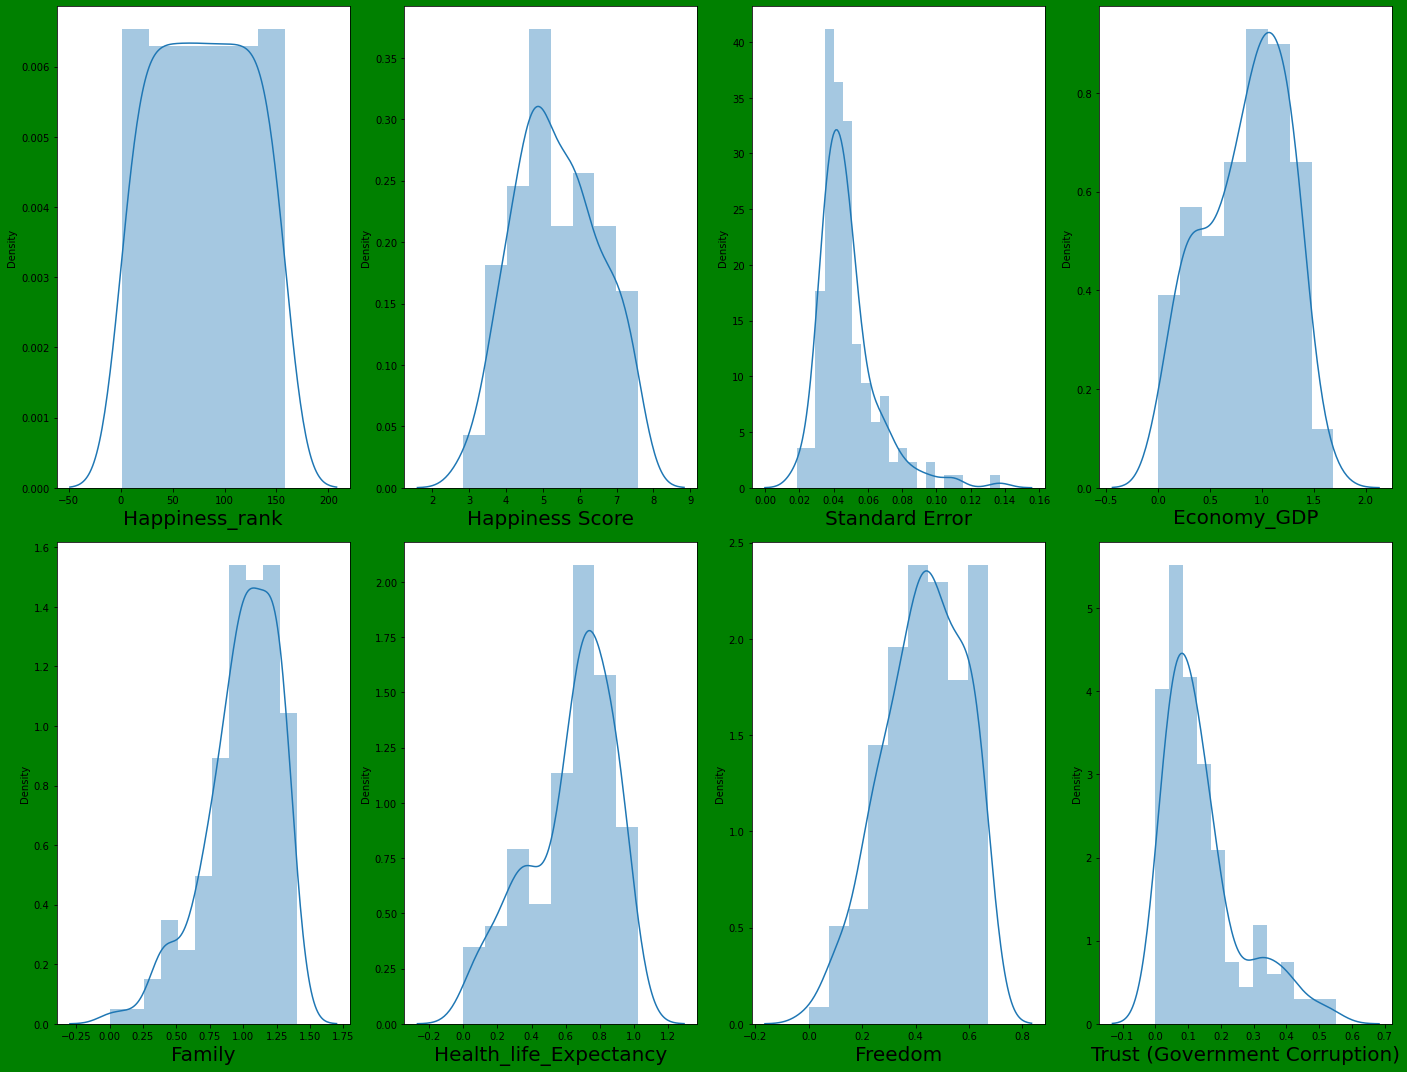

In [55]:
# ploting boxplot
plt.figure(figsize = (20,15), facecolor ='green')
plotnumber = 1

for column in df:
  if plotnumber<=8:
    ax = plt.subplot(2,4,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize = 20)
  plotnumber+=1
plt.tight_layout()

* data is almost in normal distribution


In [56]:
# lets divide our lable column and feature column

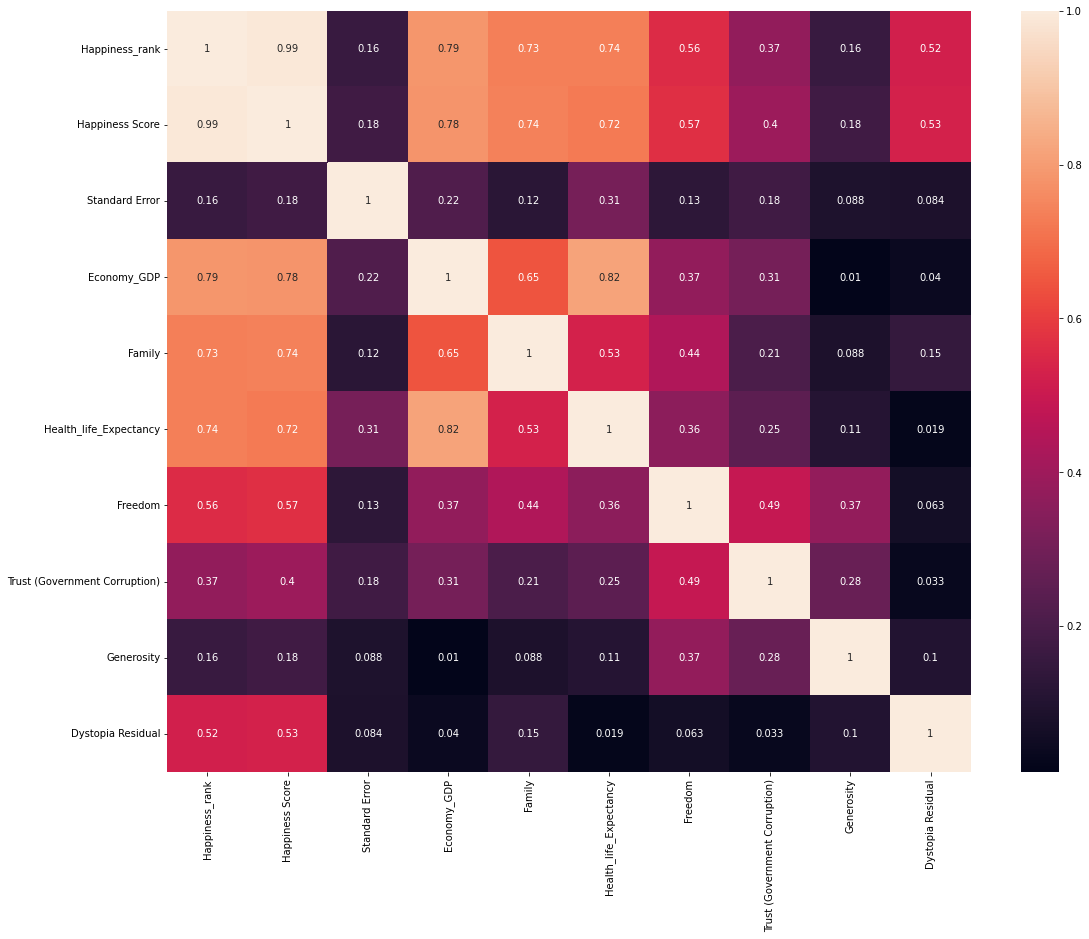

In [57]:
# checking for corelation
df_corr = df.corr().abs() 
plt.figure(figsize =(18,14))
sns.heatmap(df_corr,annot = True, annot_kws ={'size':10})
plt.show()

* we gona keep banchmark here of 0.80
* Economy GDP and health have multicolinearity 

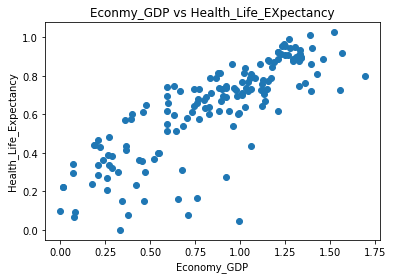

In [58]:
# Make sure they are really correlated (it should follow some trend)
plt.scatter(df.Economy_GDP,df.Health_life_Expectancy)
plt.xlabel('Economy_GDP')
plt.ylabel('Health_Life_Expectancy')
plt.title('Econmy_GDP vs Health_Life_EXpectancy')
plt.show()

* it proved now that they have multicollinearity we need remove one column from them

In [59]:
df.drop(['Health_life_Expectancy'], axis=1,inplace = True)


In [60]:
df.head()

,Happiness_rank,Happiness Score,Standard Error,Economy_GDP,Family,Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.63297,0.32957,0.45811,2.45176


In [74]:
# now lets seperate them 
x = df.drop(columns = ['Happiness Score'])
y = df['Happiness Score']

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

In [88]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [90]:
y_pred = regressor.predict(x_test)

In [ ]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

In [94]:
regressor.score(x_train,y_train)

1.0

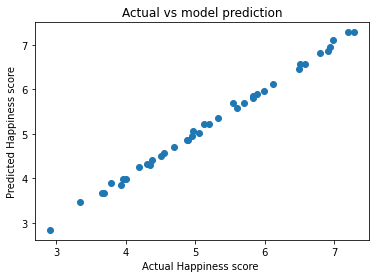

In [96]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Happiness score ')
plt.ylabel('Predicted Happiness score')
plt.title('Actual vs model prediction')
plt.show()

In [95]:

regressor.score(x_test,y_test)

0.9975658537005866

In [92]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.040849999999999984
Mean Squared Error: 0.0032395499999999995
Root Mean Squared Error: 0.056917044898694445
